# Exploritory Data Analyisis of Washington State Political Donors

Link to the Dataset:
https://catalog.data.gov/dataset/contributions-to-candidates-and-political-committees

The dataset contains 6,136,766 rows (instances) of political donations made to candidates and state initiates, in the years spanning 2007-2026.

While the dataset oringally had thirty-five columns, only three 'filer_name', 'amount', and 'election_year' where germane to the anaylsis due to, relevance and sparsity. 

The analysis explores the budgetary flow of donation money from Washington State PACs durring the timeframe.
Four predictive models where used on the data in an attempt to make a workable forecast model with good accuracy.

The models where not accurate and the outputs indicated that no linear trend exists in the data. Given this dataset, there is no indication of donation money increasing or decreasing over time. 

Null Hypothesis H0: 
The distribution of political donations is random.

Alternative Hypothesis H1: 
The distribution of political donations is not random.

Research Questions:
1.	How many unique political donors?

2.	Who are the top 30 names of the most frequent donars?

3.	Which donors have contributed the largest sums of money throughout the years?

4.	Who is the top donor of all time? 

5.	Given the 4 models, Nueral Net, GradientBooster, Polynomial Regression, and LOESS, can a accurate predictive model be constructed from the data?  

This study explores the distribution of political donations in Washington State using a dataset from www.Data.gov. The null hypothesis posits that the distribution is random, while the alternative hypothesis suggests otherwise. Four predictive models, including Neural Net, Gradient Booster, Polynomial Regression, and LOESS, are employed to forecast donation patterns. The dataset is cleaned, and statistical tools such as KDE plots and Shapiro-Wilk tests are used for analysis. However, none of the models provide accurate predictions, leading to acceptance of the null hypothesis. The study also identifies top donors and observes trends in donation frequency. While predictive accuracy is lacking, the exploratory analysis provides valuable insights for political campaign strategy.

# Step 1: Data Import and Inspection 

In [1]:
#-- Importing all nessesary liberaries --#

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor 
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")

2023-11-14 16:45:03.927713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#-- Importing the raw data set and creating a pandas data frame named 'df_raw' --#
df_raw = pd.read_csv('/Users/michaelsegaline/Desktop/Contributions_to_Candidates_and_Political_Committees.csv')

In [3]:
#-- Inspecting the Dataset --#
df_raw.head()

,id,report_number,origin,committee_id,filer_id,type,filer_name,office,legislative_district,position,...,contributor_address,contributor_city,contributor_state,contributor_zip,contributor_occupation,contributor_employer_name,contributor_employer_city,contributor_employer_state,url,contributor_location
0,17656709,110170428,C3,31937,FANTT--969,Candidate,"Thomas John Fantini (Thomas ""TJ"" Fantini)",CITY COUNCIL MEMBER,NaN,City Council Member Position 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN
1,17656708,110170428,C3,31937,FANTT--969,Candidate,"Thomas John Fantini (Thomas ""TJ"" Fantini)",CITY COUNCIL MEMBER,NaN,City Council Member Position 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN
2,17656707,110170428,C3,31937,FANTT--969,Candidate,"Thomas John Fantini (Thomas ""TJ"" Fantini)",CITY COUNCIL MEMBER,NaN,City Council Member Position 3,...,1613 41st St,Anacortes,WA,98221,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN
3,17656706,110170428,C3,31937,FANTT--969,Candidate,"Thomas John Fantini (Thomas ""TJ"" Fantini)",CITY COUNCIL MEMBER,NaN,City Council Member Position 3,...,618 St Mary’s Place,Anacortes,WA,98221,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN
4,17656705,110170428,C3,31937,FANTT--969,Candidate,"Thomas John Fantini (Thomas ""TJ"" Fantini)",CITY COUNCIL MEMBER,NaN,City Council Member Position 3,...,1514 7th St,Anacortes,WA,98221,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN


In [4]:
#-- Exploring the columns in the dataframe --#
df_raw.columns

Index(['id', 'report_number', 'origin', 'committee_id', 'filer_id', 'type',
       'filer_name', 'office', 'legislative_district', 'position', 'party',
       'ballot_number', 'for_or_against', 'jurisdiction',
       'jurisdiction_county', 'jurisdiction_type', 'election_year', 'amount',
       'cash_or_in_kind', 'receipt_date', 'description', 'memo',
       'primary_general', 'code', 'contributor_category', 'contributor_name',
       'contributor_address', 'contributor_city', 'contributor_state',
       'contributor_zip', 'contributor_occupation',
       'contributor_employer_name', 'contributor_employer_city',
       'contributor_employer_state', 'url', 'contributor_location'],
      dtype='object')

In [5]:
#-- Inspecting the size of the dataframe, it has 6,136,766 instances of political donations to canidates --#
df_raw.shape

(6136766, 36)

# Step 2 Data Cleaning

In [6]:
#-- Creating a new dataframe with the relevant variables --# 
#-- Now selecting the relevant varaibles --#
columns_to_keep = ['filer_name', 'election_year', 'amount' ]

df = df_raw[columns_to_keep]
df.head()

,filer_name,election_year,amount
0,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,50.00
1,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,100.00
2,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,103.48
3,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,51.99
4,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,103.48


In [7]:
#-- Now dropping all the rows with empty values to produce a clean dataframe --#
df.dropna()

,filer_name,election_year,amount
0,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,50.00
1,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,100.00
2,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,103.48
3,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,51.99
4,"Thomas John Fantini (Thomas ""TJ"" Fantini)",2023,103.48
...,...,...,...
6136761,Paul Graves (PAUL GRAVES),2018,200.00
6136762,Paul Graves (PAUL GRAVES),2018,100.00
6136763,Paul Graves (PAUL GRAVES),2018,100.00
6136764,Paul Graves (PAUL GRAVES),2018,50.00


In [8]:
#-- Getting descriptive statistics --#
df.describe()

,election_year,amount
count,6.136766e+06,6.136766e+06
mean,2.015464e+03,2.862966e+02
std,4.814356e+00,9.981094e+03
min,2.007000e+03,-2.500000e+06
25%,2.012000e+03,1.000000e+01
50%,2.016000e+03,3.500000e+01
75%,2.020000e+03,1.000000e+02
max,2.026000e+03,8.929810e+06


The descriptive statistics indicate that the mean donation amount is $286 per year, per donor. 

# Step 3 Data Exploration

Univartiate Exploration 

The following two graphs indicate that more feature engineering must be conducted with the 'amount' column. The number of big donar outliers have skewed the data, so that instances of donations near the '0' mark are viewed as negatives.

<AxesSubplot:xlabel='amount', ylabel='Density'>

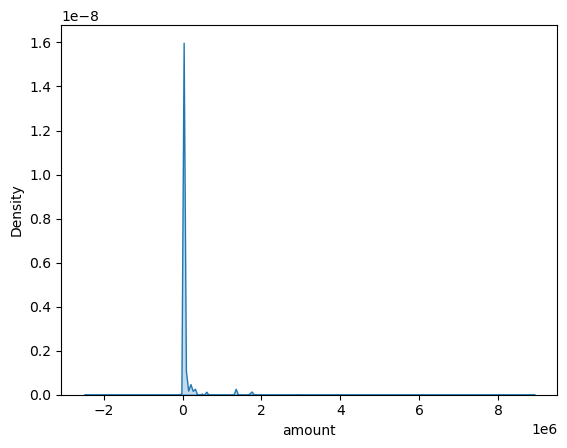

In [9]:
#-- Visualizing the distrobution of "amount" of money contrubuted via Kernel Density Estimate Plot (kde) --#

sns.kdeplot(df.amount, shade = True)

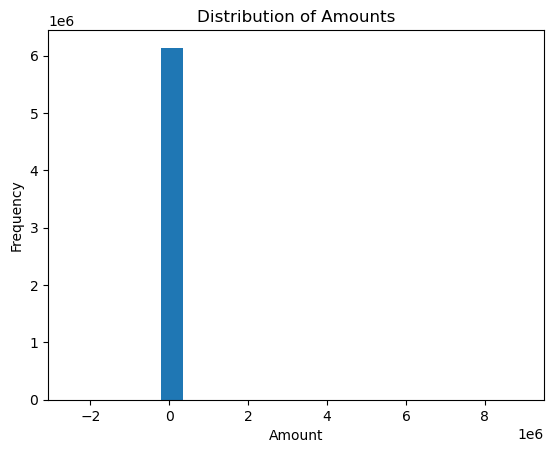

In [10]:
#-- Exploring the density of 'Amount' and 'Frequency' in a histogram plot --#
plt.hist(df['amount'], bins=20)  
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Amounts")
plt.show()

While the dataset indicated that some people did get donations refunded to them,the negative numbers wouldnt be enough to skewed the distrobution to be on the 'negative' side of '0'. Therefore it is the outliers that skewed small amounts to viewed as negative on the curve. Therefore the variable 'amount', must be converted to the absolute value. 

In [11]:
#-- Create a new DataFrame with positive values --#
df['amount'] = df['amount'].abs()

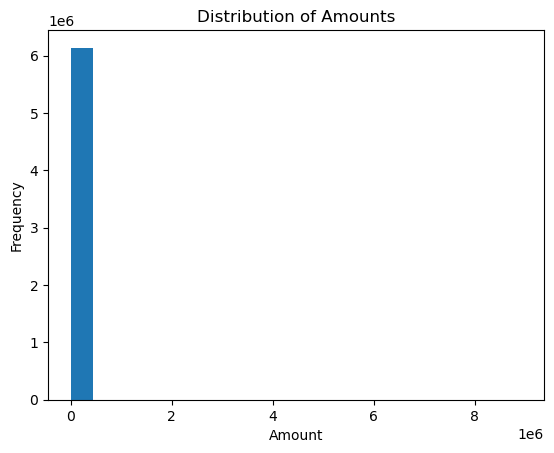

In [12]:
plt.hist(df['amount'], bins=20)  
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Amounts")
plt.show()


Now all the data in the amount column is positive. Yeilding a mean of $291 donated per donor per year. Naturally the average Washingtonian is not donating that much; This is the result of the Political Action Committies (PACs), whom are donating large sums and skewing the distrobution. 

In [13]:
df.amount.describe()

count    6.136766e+06
mean     2.917273e+02
std      9.980937e+03
min      1.000000e-02
25%      1.000000e+01
50%      3.500000e+01
75%      1.000000e+02
max      8.929810e+06
Name: amount, dtype: float64

<AxesSubplot:xlabel='election_year', ylabel='Density'>

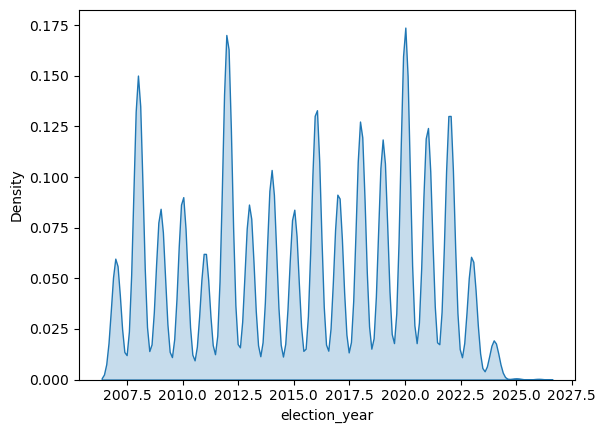

In [14]:
#-- Visualizing the frequency distrobution of "election_year" --#


sns.kdeplot(df.election_year, shade = True)

The above graph shows the frquenceny of donations per year (not a dollar amount).

Bivariate Exploration = Exploring 2 variables at the same time.

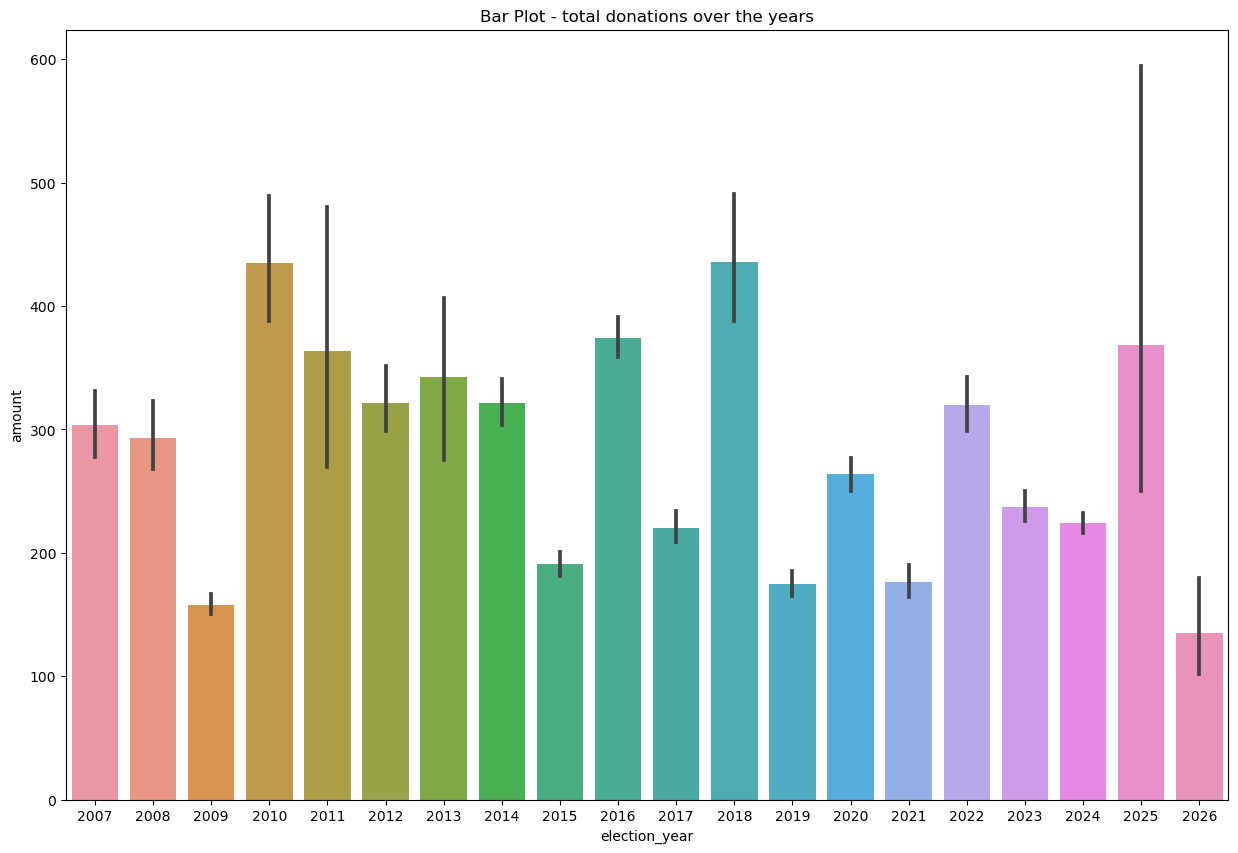

In [23]:
#-- Barplot of the indicating the amount of money donated per year --#
plt.figure(figsize=(15, 10))
sns.barplot(data = df, x="election_year", y= 'amount')
plt.title('Bar Plot - total donations over the years')
plt.show()

Notice that 2010 is the highest year for donations. Notice that presidential election years have spikes of doanations, with the year prior to a presidential election, yeilding the least. Aside from the outliering years of  2010 adn 2018, the peak-years are consistantly around $400 Million. 

# Now inspecting the names of political donors or PACs


In [16]:
#-- Count the number of unique donor names --#
unique_name_count = df.filer_name.nunique()

#-- Print the count of unique donor names --#
print("Number of unique donors:", unique_name_count)

Number of unique donors: 9629


# Of those 9629 names, below the top 30 with the highest frequency to donations (not dollar amount)

In [17]:
#-- Use the 'value_counts()' function to count the occurrences of each name --#
name_counts = df['filer_name'].value_counts()

#-- Get the top 30 most frequent names --#
top_30_names = name_counts.head(30)

#-- Print the top 30 names and their counts --#
print(top_30_names)

WASHINGTON EDUCATION ASSOCIATION POLITICAL ACTION COMMITTEE                              503791
FIREFIGHTERS ACTION SUPPORT TEAM (FAST PAC)                                              291133
WASHINGTON REALTORS POLITICAL ACTION COMMITTEE                                           249200
International Brotherhood of Electrical Workers Local 77 Joe Murphy PAC                  110875
WA ST TROOPERS PAC                                                                       105451
WASHINGTON STATE ASSOCIATION FOR JUSTICE JUSTICE FOR ALL                                  89659
ROSSI DINO J                                                                              84714
Jay R Inslee (JAY INSLEE)                                                                 82728
NUCOR PAC OF WA                                                                           75914
SEATTLE FIRE FIGHTERS PAC                                                                 73267
MCKENNA ROBERT M (ROBERT MCKENNA)       

# Below is the top 20 donors of total sum of dollars: 

In [18]:

#-- Group by 'Name' and calculate the sum of 'amount' for each name --#
name_amount_totals = df.groupby('filer_name')['amount'].sum()

#-- Get the top 20 names and their total 'amount' donated --#
top_20_names = name_amount_totals.nlargest(20)

#-- Print the top 20 names and their total 'amount' donated --#
print(top_20_names)

filer_name
NO ON 1631 (SPONSORED BY WESTERN STATES PETROLEUM ASSOCIATION)    31670041.80
YES ON 1183 COALITION                                             26181709.08
WASHINGTON EDUCATION ASSOCIATION POLITICAL ACTION COMMITTEE       26174091.04
NEW DIRECTION PAC                                                 25350380.71
Washington State Democratic Committee - NonExempt                 24321241.75
NO ON 522                                                         22915729.93
Washington State Democratic Committee - Exempt                    22896252.47
YES! TO AFFORDABLE GROCERIES, (SEE EMAIL FOR REST OF NAME)        22442233.51
HOUSE DEMOCRATIC CAMPAIGN COMMITTEE (HDCC)                        21767655.20
PROTECT OUR COMMUNITIES                                           21250779.95
The Leadership Council                                            19966355.45
HARRY TRUMAN FUND                                                 18378859.76
WASHINGTON REALTORS POLITICAL ACTION COMMITTEE       

# Below is the top 5 donors  of overall donations over time.

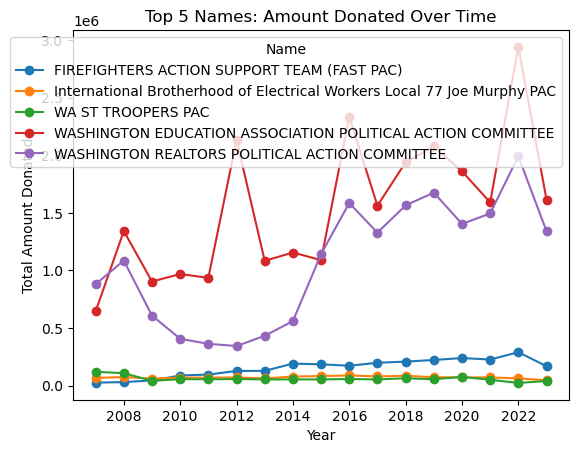

In [19]:
#-- Filter data for the top 5 names --#
top_names = df['filer_name'].value_counts().head(5).index
filtered_df = df[df['filer_name'].isin(top_names)]

#-- Group and aggregate data --#
agg_df = filtered_df.groupby(['election_year', 'filer_name'])['amount'].sum().unstack()

#-- Create the time series plot --#
agg_df.plot(marker='o')

#-- Customize the plot --#
plt.title("Top 5 Names: Amount Donated Over Time")
plt.xlabel("Year")
plt.ylabel("Total Amount Donated")
plt.legend(title="Name")

#-- Show the plot --#
plt.show()

The above graph indicates that the Washington Education Asociation Poitical Action Committee (WEP) and Washington Realators Political Action Committee (RAP) are the most frequent doners to politcal initatives or canditates; Meanwhile, Firefighters Action Support Team is in a distant 3rd place. 

It appears that 2015, the biggest outlier doner(s) began to have a competition. Notice that from 2015 on, both WEP and RAP's outlier doners, have a very similar distrobution; WEP always able to keep the lead as the Washington Realtors Political Action Commitee donates in an attempt to match. 

The number of donations to canidates is niether increasing nor decreasing over time, as verified with the following models:

In [20]:
#-- Now Dropping the outliers (WEP, RAP) to increase --#

# Get the top 2 names
top_names = df['filer_name'].value_counts().head(2).index

# Filter out rows with 'filer_name' in the top 2
df_filtered = df[~df['filer_name'].isin(top_names)]

# Testing for Normality with the Shapiro-Wilk test.

In [21]:
#-- Perform the Shapiro-Wilk test --#
statistic, p_value = stats.shapiro(df.amount)

#-- Check the p-value to determine if the data is normally distributed --#
alpha = 0.05  # Significance level
if p_value > alpha:
    print("Sample looks Gaussian (normally distributed)")
else:
    print("Sample does not look Gaussian (not normally distributed)")

Sample does not look Gaussian (not normally distributed)


<AxesSubplot:xlabel='amount', ylabel='Density'>

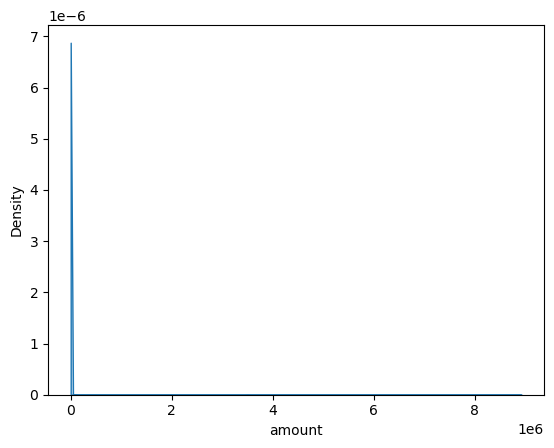

In [22]:
sns.kdeplot(df.amount, shade = True)

The distrobution of the 'amount' variable is not Guasian or Normal, so the assumptions of parametric models are not met. Therefore other predictive non-parametric models will be explored.

# Now training a Neural Net to predict the amount per year.

In [38]:
#-- Spliting data into a training and testing set --#
X = df[['election_year']]  #-- Features (independent variable)--#
y = df['amount']    #-- Target variable (dependent variable) --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:

#--Creating an early stopping monitor for computation / time saving --#

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience =2)

# Build a simple feedforward neural network
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),   # Input layer
    keras.layers.Dense(64, activation='relu'),       # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(32, activation='relu'),       # Hidden layer with 32 neurons and ReLU activation
    keras.layers.Dense(1, activation='linear')       # Output layer with linear activation for regression
])

#-- Compile the model --#
model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression tasks

#-- Train the model --#

#-- After 10 epochs, there is not a very big reduction in model loss --#
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
153420/153420 [==============================] - 208s 1ms/step - loss: 113745304.0000 - val_loss: 42907308.0000
Epoch 2/10
153420/153420 [==============================] - 205s 1ms/step - loss: 113746000.0000 - val_loss: 42906052.0000
Epoch 3/10
153420/153420 [==============================] - 204s 1ms/step - loss: 113747576.0000 - val_loss: 42912248.0000
Epoch 4/10
153420/153420 [==============================] - 202s 1ms/step - loss: 113745832.0000 - val_loss: 42907072.0000
Epoch 5/10
153420/153420 [==============================] - 203s 1ms/step - loss: 113746632.0000 - val_loss: 42907916.0000
Epoch 6/10
153420/153420 [==============================] - 210s 1ms/step - loss: 113750224.0000 - val_loss: 42907132.0000
Epoch 7/10
153420/153420 [==============================] - 208s 1ms/step - loss: 113739032.0000 - val_loss: 42910540.0000
Epoch 8/10
153420/153420 [==============================] - 201s 1ms/step - loss: 113750296.0000 - val_loss: 42906028.0000
Epoch 9/10
15342

In [39]:
#-- Evaluate the model --#
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")

38355/38355 [==============================] - 36s 945us/step - loss: 42909140.0000
Mean Squared Error: 42909140.0


In [22]:
#-- Create a list of the next 10 years (or adjust as needed) --#
next_years = np.arange(2026, 2036).reshape(-1, 1)

#-- Use your trained model to make predictions --#
predictions = model.predict(next_years)

#-- Print the predictions --#
for year, prediction in zip(next_years, predictions):
    print(f"Year: {year[0]}, Predicted Amount: {prediction[0]}")

1/1 [==============================] - 0s 19ms/step
Year: 2026, Predicted Amount: 233.08114624023438
Year: 2027, Predicted Amount: 233.19549560546875
Year: 2028, Predicted Amount: 233.30984497070312
Year: 2029, Predicted Amount: 233.4241943359375
Year: 2030, Predicted Amount: 233.53851318359375
Year: 2031, Predicted Amount: 233.65286254882812
Year: 2032, Predicted Amount: 233.7672119140625
Year: 2033, Predicted Amount: 233.88156127929688
Year: 2034, Predicted Amount: 233.99591064453125
Year: 2035, Predicted Amount: 234.11024475097656


The neural net yeilded a Mean Squared Error score of 42909140 after 10 epochs. When testing other model wieghts, it would be too computationally expensive to run say 100 epochs to increase the model accuracy. The running more epochs wont nessesary improve the model score either. Lastly the model predictions for the next 10 years is trending around the $233 mark. 

# Now using ensemble methods 

In [32]:
#-- Create a Gradient Boosting Regressor --#
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


Mean Squared Error: 42907193.856706366
R-squared (R2): 3.7794255936196564e-05


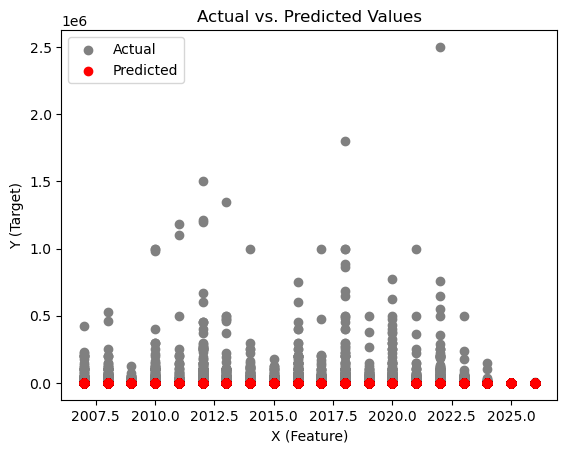

In [33]:
#-- Calculate MSE --#
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#-- Calculate R-squared (R2) --#
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

#-- Visualize the predicted values --#
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.title('Actual vs. Predicted Values')
plt.show()

Gradientbooster is an ensmble method, meaning, it runs numerous small decision trees at the same time. Its a strong non-parametric model that can handle dirty and non-parametric data.

The Mean Squared Error (MSE) is a metric used to measure the average squared difference between the predicted values and the actual values in a regression problem. It's calculated by taking the average of the squares of the differences between the predicted and actual values for each data point.

MSE is a crucial tool to assess the accuracy of a regression model, where a lower MSE indicates that the model is closer to the actual values.

With a MSE of 42,907,193 does not indicate that the model is nowhere near accurate and idenitical to the Neural Net's MSE score. 

Additionally the R2 or Coefficient of determination should be as close to '1' as possible to indicate an accurate score. An R2 score of 0.0000377 is not an accurate model.

# Now running Polynomial Linear Regression

Mean Squared Error: 99618388.74829671
R-squared (R2): 7.048061900216673e-06


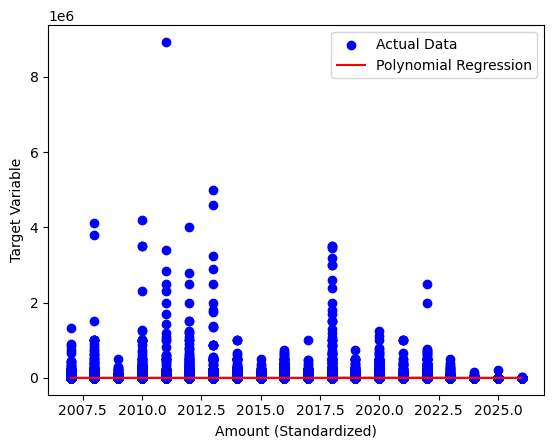

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#-- Create polynomial features of degree 2 --#
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#-- Create and fit a linear regression model --#
regressor = LinearRegression()
regressor.fit(X_poly, y)

#-- Make predictions on the same data for visualization --#
y_pred = regressor.predict(X_poly)

#-- Calculate model evaluation scores --#
mse = mean_squared_error(y, y_pred)  # Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

#-- Visualization: Plot the original data points and the regression line --#
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')

plt.xlabel('Amount (Standardized)')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

With a MSE of 99,618,388 does not indicate that the model is nowhere near accurate and idenitical to the Neural Net's MSE score. Mooreover,An R2 score of 0.000006 is not an accurate model. 

In the above timeline, 2018 is the most dense year with political donations. 



# Now Running LOESS Regression

In [11]:
#-- The Variables have to be converted to a numpy array --#

X = df['election_year'].values
y = df['amount'].values

In [12]:
lowess = sm.nonparametric.lowess(y, X, frac=0.3)

In [13]:
#-- Extract Smooth Values --#
smoothed_x = lowess[:, 0]
smoothed_y = lowess[:, 1]

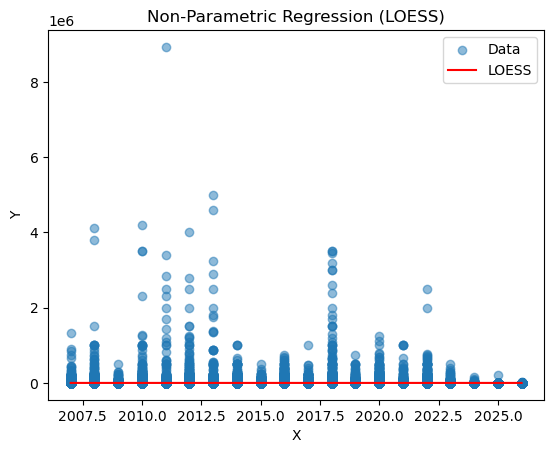

In [14]:
#-- Plot the Values --#
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(smoothed_x, smoothed_y, 'r', label='LOESS')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Parametric Regression (LOESS)')
plt.show()

With LOESS there's no single score, like R-squared in linear regression, for LOESS smoothing because it's not a traditional regression method but rather a data visualization tool.

The above visualization indicates the line of best fit, "red line", is directly on the '0' mark; Showcasing that there is no appearent trend in the data on direction or the other. While the distrobution of the residuals matchs the previous visulizations.

# In Final Anlysis: 

1.	How many unique political donors?



According to the data there are 9629 unique political donors to include political action committees.

2.	Who are the Top 30 names of most frequent donars?



The output was rendered in the above visualization.

3.	Which donors have contributed the largest sums of money throughout the years?



The above output was renedered with the top 5 PACS: Washington Education Asociation Poitical Action Committee (WEP) and Washington Realtors Political Action Committee (RAP) are the most frequent doners to politcal initatives or canditates; Meanwhile, Firefighters Action Support Team is in a distant 3rd place.

4.	Who is the top donor of all time? 



Washington Education Asociation Poitical Action Committee (WEP) 

5.	Given the 4 models, Nueral Net, GradientBooster, Polynomial Regression, and LOESS, can a accurate predictive model be constructed from the data? 




No,we accept the Null Hypothesis H0:, that the frequency distribution of political donations is random and does not demonstrate any patterns. 

If the alternative hypothesis were true, given the dataset size, one of the four predictive models would have yielded more accurate results.

The data was visually left skewed towards the ‘0’ mark and tested negative for being Guassian or parametric in the Shapiro-Wilk test. 

The neural net had an accuracy of 42,909,140; after experimenting with different model weights. The mean squared error should be near 0, 42 million is completely unacceptable. 

The mean square error of the gradient booster ensemble method was similar at 42,907,000 and an Coefficient of Determination score of 0.0000377. The coefficient should be near 1, instead, it pairs with the inaccurate MSE score. 

Thirdly the polynomial regression, didn’t provide a good score either, with an MSE score of 99 million and a bad R2 score to match at 0.000007. 

Lastly, the LOESS test / visualization indications that the line of best fit, through the residuals, is at the ‘0’ mark; Reconfirming a poor predictive model. 
